In [110]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Load in data and centroids as per assignment
my_data = np.array([[1,1],[1,2],[2,1],[2,3],[3,3],[4,5],[5,4],[6,5]])
my_cent = np.array([[2,3], [3,3], [5,4]])

In [112]:
# Simple Euclidean distance function
def euclidian_distance(A, B):
    return (sum(A-B)**2)**0.5

In [113]:
# Calculate new centroids
def calculate_new_clusters(centroids, data):
    clusters = []
    for i in range(data.shape[0]):
        distances = []
        for cent in centroids:
            # Get euclidean distances between each centroid and each data point
            distances.append(euclidian_distance(cent, data[i]))
        
        # Choose smallest distance
        clust = [z for z, val in enumerate(distances) if val==min(distances)]
        #debug
        # print(distances)
        # print(clust)
        clusters.append(clust[0])

    return clusters

In [114]:
# Calculate new centroids
def calculate_new_centroids(clusters, data):
    centroids = []
    cluster_dataframe = pd.concat([pd.DataFrame(data), pd.DataFrame(clusters,columns=['cluster'])], axis=1)

    for c in set(cluster_dataframe['cluster']):
        temp_cluster = cluster_dataframe[cluster_dataframe['cluster']==c][cluster_dataframe.columns[:-1]]
        cluster_mean = temp_cluster.mean(axis=0)
        centroids.append(cluster_mean)
    return centroids

In [115]:
# Calculate sum of square variance
def sum_squared_error(clusters, data):
    ss = []
    cluster_dataframe = pd.concat([pd.DataFrame(data), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_dataframe['cluster']):
        temp_cluster = cluster_dataframe[cluster_dataframe['cluster']==c][cluster_dataframe.columns[:-1]]
        cluster_mean = temp_cluster.mean(axis=0)
        # Create N x 1 matrix with mean in all positions
        mean_cluster = np.matlib.repmat(cluster_mean, temp_cluster.shape[0],1) 
        ss.append(np.sum(np.sum((temp_cluster - mean_cluster)**2))) # subtract mean from all positions and do sum of squares
    return ss

In [116]:
cluster_vars = []

clusters = calculate_new_clusters(my_cent, my_data)

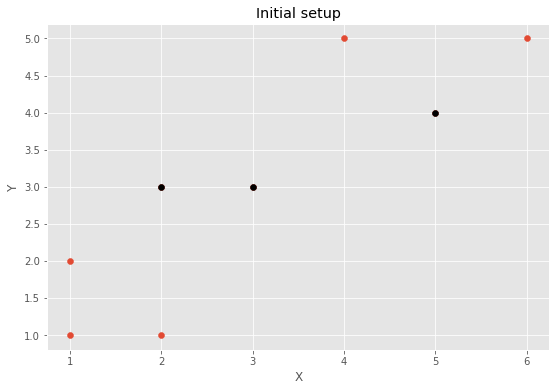

In [117]:
# Plot everything first
plt.subplots(figsize=(9,6))
plt.scatter(x=my_data[:,0], y=my_data[:,1],  cmap=plt.cm.Spectral);
cent = np.array(my_cent)
plt.scatter(x=cent[:,0], y=cent[:,1], c='black') # show centroids
plt.title('Initial setup')
plt.xlabel('X')
plt.ylabel('Y');

In [118]:
cluster_vars = []

clusters = calculate_new_clusters(my_cent, my_data)

initial_clusters = clusters
print(0, round(np.mean(sum_squared_error(clusters,my_data))))

# for i in range(1):
centroids = calculate_new_centroids(clusters, my_data)
print("new centroids: ", np.array(centroids))
clusters = calculate_new_clusters(my_cent, my_data)
clustvar = np.mean(sum_squared_error(clusters, my_data))
cluster_vars.append(clustvar)
# print(i+1, round(clustvar))


# plt.scatter(my_data[:,0], my_data[:,1], s=150)
# # plt.savefig("plot.png")
# plt.show()

0 2
new centroids:  [[1.5        1.75      ]
 [3.         3.        ]
 [5.         4.66666667]]


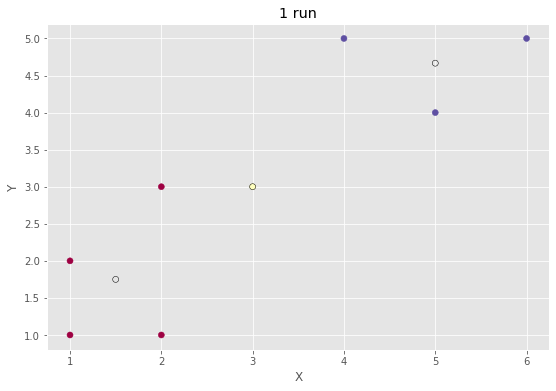

In [119]:
plt.subplots(figsize=(9,6))
plt.scatter(x=my_data[:,0], y=my_data[:,1], c=clusters, cmap=plt.cm.Spectral);
cent = np.array(centroids)
plt.scatter(x=cent[:,0], y=cent[:,1], facecolors='none', edgecolors='black') # show centroids
plt.title('1 run')
plt.xlabel('X')
plt.ylabel('Y');

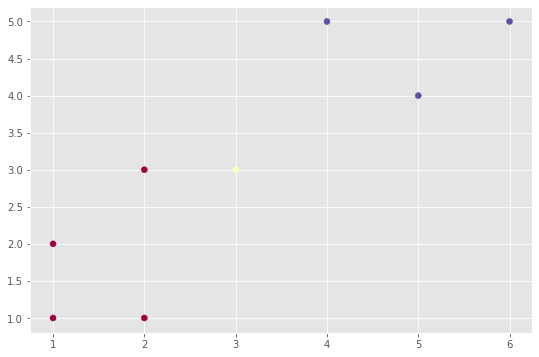

In [120]:
plt.subplots(figsize=(9,6))
plt.scatter(x=my_data[:,0], y=my_data[:,1], c=initial_clusters, cmap=plt.cm.Spectral);